In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

df= pd.read_csv('Cancer_Data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.shape

(569, 33)

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#checking all patient 'id' valuables are unique 
df['id'].nunique()

569

In [9]:
df['id'].value_counts()

842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64

In [10]:
df.drop(["Unnamed: 32"], axis=1, inplace=True)

In [11]:
df.groupby(["diagnosis"]).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [12]:
#i prefer to make subcategorical dataframes from main dataframe, if need i can analysefurther details easily.

In [13]:
#this is for malign patients:
m_df = df[df["diagnosis"] == "M"]

print(m_df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compa

In [14]:
#and this for benings:
b_df = df[df["diagnosis"] == "B"]

print(b_df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
37     854941         B       13.030         18.42           82.61      523.8   
46   85713702         B        8.196         16.84           51.71      201.9   
..        ...       ...          ...           ...             ...        ...   
558    925277         B       14.590         22.68           96.39      657.1   
559    925291         B       11.510         23.93           74.52      403.5   
560    925292         B       14.050         27.15           91.38      600.4   
561    925311         B       11.200         29.37           70.67      386.0   
568     92751         B        7.760         24.54           47.92      181.0   

     smoothness_mean  compa

In [15]:
m_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [16]:
b_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [17]:
m_df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.148163,0.164909,0.146509,0.173933,-0.032528,-0.006873,0.068292,0.069407,-0.117900,...,0.148474,0.093222,0.152510,0.183836,-0.050112,-0.047110,-0.018537,0.035155,-0.146282,-0.096551
radius_mean,0.148163,1.000000,0.106516,0.995281,0.990078,-0.116036,0.169168,0.482750,0.675519,-0.076442,...,0.921653,-0.088890,0.914877,0.893935,-0.326649,-0.114824,0.069621,0.383461,-0.266375,-0.383367
texture_mean,0.164909,0.106516,1.000000,0.110682,0.103729,-0.143920,0.032567,0.067135,0.017453,-0.090009,...,0.126022,0.846831,0.136605,0.126698,-0.024013,0.104080,0.110075,-0.002213,-0.087386,0.025960
perimeter_mean,0.146509,0.995281,0.110682,1.000000,0.987223,-0.052401,0.256409,0.554994,0.730158,-0.014329,...,0.915740,-0.085690,0.922055,0.889046,-0.283087,-0.048618,0.134977,0.437786,-0.231742,-0.326549
area_mean,0.173933,0.990078,0.103729,0.987223,1.000000,-0.088281,0.170181,0.493151,0.677513,-0.080828,...,0.920320,-0.081751,0.915728,0.911396,-0.298038,-0.108104,0.077150,0.385717,-0.270648,-0.366243
smoothness_mean,-0.032528,-0.116036,-0.143920,-0.052401,-0.088281,1.000000,0.676433,0.635084,0.548641,0.578216,...,-0.078090,-0.049479,-0.021225,-0.065037,0.744670,0.482854,0.519063,0.505126,0.347218,0.549125
compactness_mean,-0.006873,0.169168,0.032567,0.256409,0.170181,0.676433,1.000000,0.847712,0.727349,0.698061,...,0.178291,0.016581,0.287660,0.163738,0.454251,0.791052,0.755552,0.740223,0.439311,0.628215
concavity_mean,0.068292,0.482750,0.067135,0.554994,0.493151,0.635084,0.847712,1.000000,0.907119,0.538166,...,0.434517,-0.023149,0.523886,0.425205,0.320552,0.539136,0.737535,0.744833,0.204104,0.329700
concave points_mean,0.069407,0.675519,0.017453,0.730158,0.677513,0.548641,0.727349,0.907119,1.000000,0.443984,...,0.632882,-0.094803,0.694507,0.610814,0.189840,0.348353,0.511464,0.768139,0.096760,0.134339
symmetry_mean,-0.117900,-0.076442,-0.090009,-0.014329,-0.080828,0.578216,0.698061,0.538166,0.443984,1.000000,...,-0.056128,-0.033130,0.016026,-0.069122,0.364422,0.526547,0.478153,0.472774,0.712949,0.477966


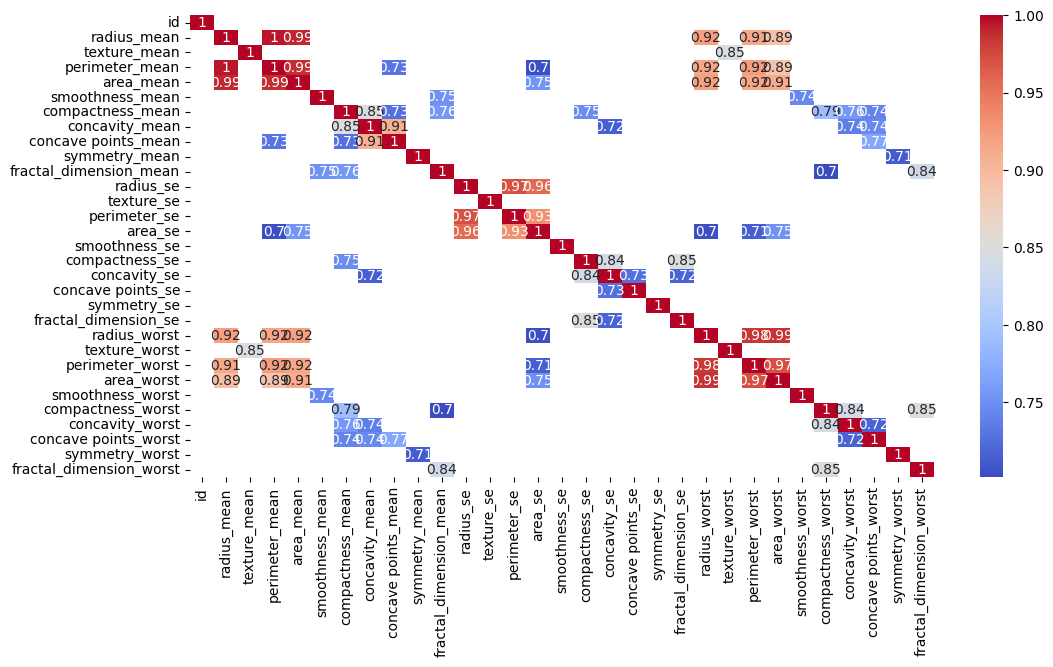

In [18]:
# plotting 2 dataframes and main dataframe
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = m_df.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

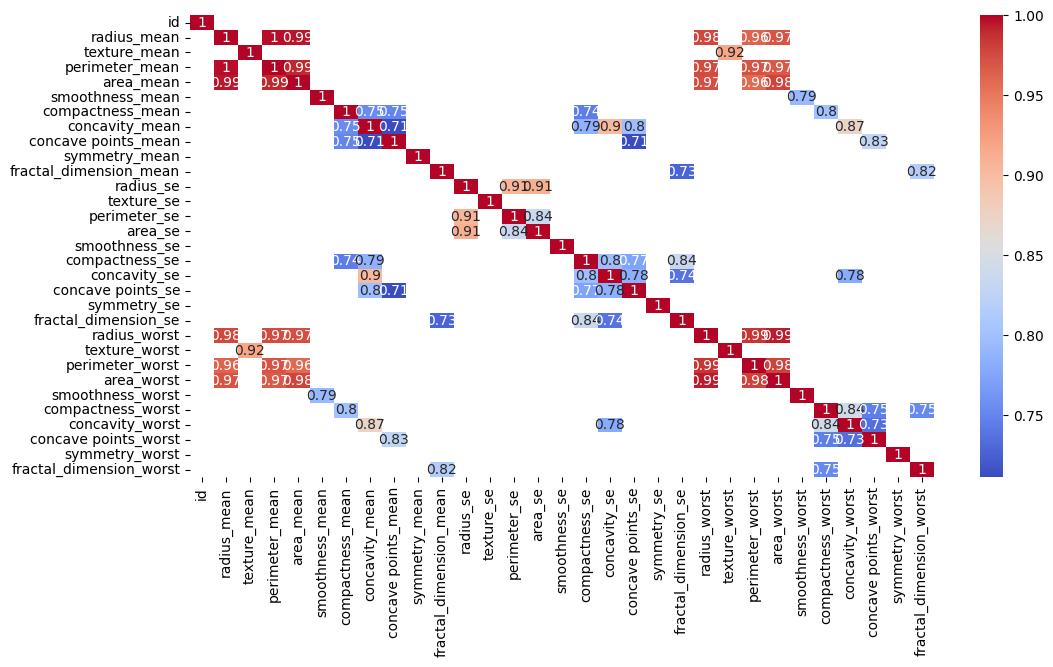

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = b_df.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

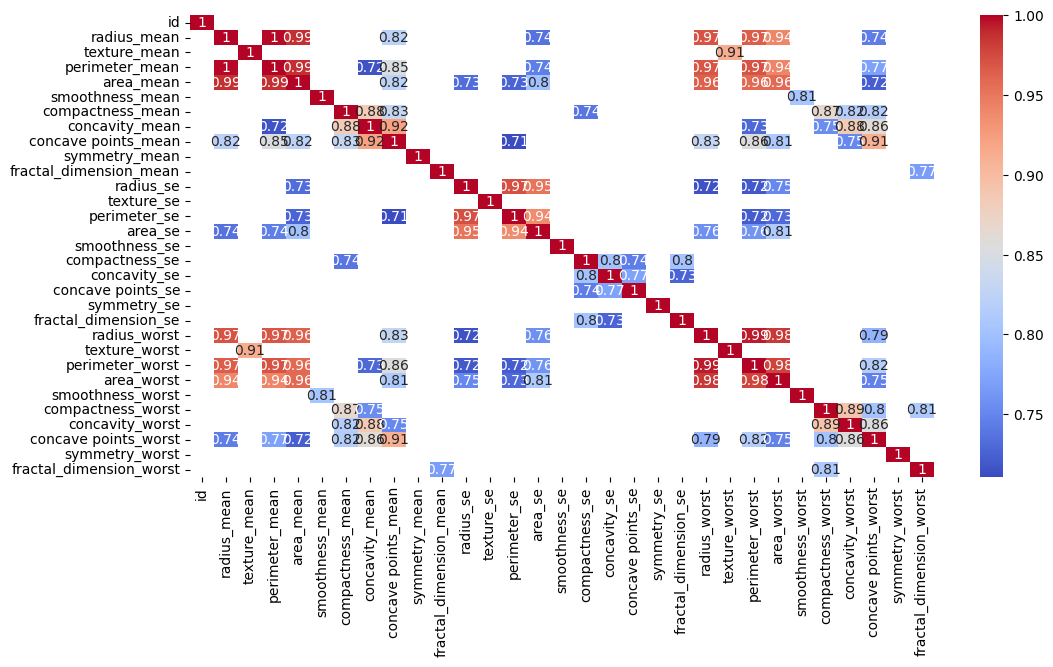

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = df.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

In [21]:
#i want to show in 2 different correlation dataframes, so i checked as two different dataframes: malign and benign.
#But as we can see even the diagnosis is different the heatmaps are roughly similar. They have identical matches, so first i will focus those:
#"radius_mean", "perimeter_mean","area_mean", "texture_mean"etc.

In [22]:
#another categorical mean analysis
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [23]:
#counting malign and benign values
m_count = df[df["diagnosis"]=="M"].value_counts()
len(m_count)

212

In [24]:
#212 malign cancer and total patient id = 569; 
#benign cancer patients;

b_count = df[df["diagnosis"]=="B"].value_counts()
len(b_count)

357

In [25]:
#going deeper
factors_m = m_df.loc[:,['perimeter_mean','radius_mean','texture_mean', 'area_mean', 'radius_worst','perimeter_worst','texture_worst', 'area_worst',]]

In [26]:
factors_m.describe()

,perimeter_mean,radius_mean,texture_mean,area_mean,radius_worst,perimeter_worst,texture_worst,area_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,115.365377,17.462830,21.604906,978.376415,21.134811,141.370330,29.318208,1422.286321
std,21.854653,3.203971,3.779470,367.937978,4.283569,29.457055,5.434804,597.967743
min,71.900000,10.950000,10.380000,361.600000,12.840000,85.100000,16.670000,508.100000
25%,98.745000,15.075000,19.327500,705.300000,17.730000,119.325000,25.782500,970.300000
50%,114.200000,17.325000,21.460000,932.000000,20.590000,138.000000,28.945000,1303.000000
75%,129.925000,19.590000,23.765000,1203.750000,23.807500,159.800000,32.690000,1712.750000
max,188.500000,28.110000,39.280000,2501.000000,36.040000,251.200000,49.540000,4254.000000


In [27]:
factors_b = b_df.loc[:,['perimeter_mean','radius_mean','texture_mean', 'area_mean', 'radius_worst','perimeter_worst','texture_worst', 'area_worst',]]
factors_b.describe()

,perimeter_mean,radius_mean,texture_mean,area_mean,radius_worst,perimeter_worst,texture_worst,area_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,78.075406,12.146524,17.914762,462.790196,13.379801,87.005938,23.515070,558.899440
std,11.807438,1.780512,3.995125,134.287118,1.981368,13.527091,5.493955,163.601424
min,43.790000,6.981000,9.710000,143.500000,7.930000,50.410000,12.020000,185.200000
25%,70.870000,11.080000,15.150000,378.200000,12.080000,78.270000,19.580000,447.100000
50%,78.180000,12.200000,17.390000,458.400000,13.350000,86.920000,22.820000,547.400000
75%,86.100000,13.370000,19.760000,551.100000,14.800000,96.590000,26.510000,670.000000
max,114.600000,17.850000,33.810000,992.100000,19.820000,127.100000,41.780000,1210.000000


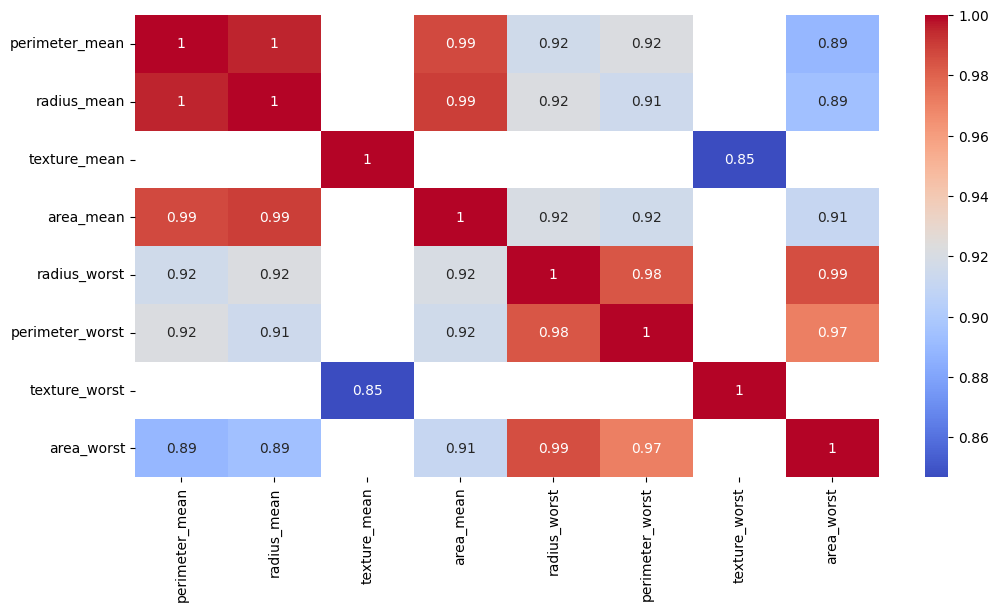

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = factors_m.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

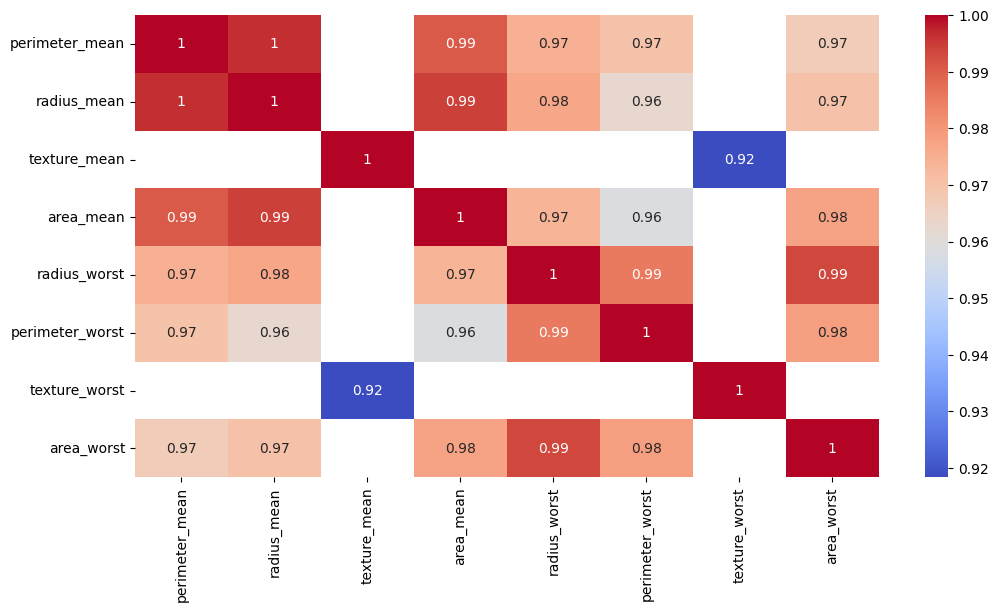

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = factors_b.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

In [30]:
factors_total = df.loc[:,['perimeter_mean','radius_mean','texture_mean', 'area_mean', 'radius_worst','perimeter_worst','texture_worst', 'area_worst',]]

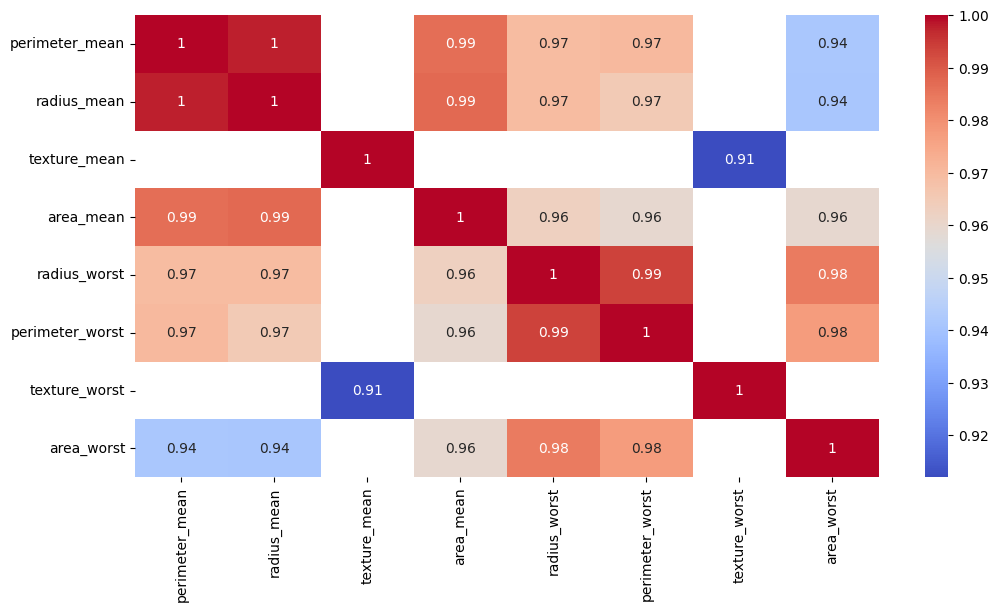

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the correlation coefficients
corr_threshold = 0.7

# Generate the correlation matrix
corr_matrix = factors_total.corr()

# Filter out the correlation coefficients below the threshold
high_corr_matrix = np.abs(corr_matrix) >= corr_threshold
corr_values = corr_matrix.where(high_corr_matrix)

# Plot the heatmap of the high correlation values
plt.figure(figsize=(12,6))
sns.heatmap(corr_values, annot=True, cmap="coolwarm")
plt.show()

In [32]:
#Multicollinearity: High correlation between independent variables can affect the performance of linear models,
#as it can make it difficult to identify the unique contribution of each variable to the target variable. 
#In this case, we may consider regularization techniques such as Lasso or Ridge regression to handle multicollinearity.

In [33]:
#we can do further and more detailed analysis with pandas and dataframes. 
#Going deeper with daraframes and more dataframes is really practical.